<center>
    <br>
        <br>
            <h5 style = "color:blue">----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</h5>
                <h1 style = "color:green">Explore Cross Validation and Hyperparameters Tunning</h1>
            <h5 style = "color:blue">----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</h5>
        <br>
    <br>
</center>

# Download Phoneme Dataset

In [1]:
from sklearn.datasets import fetch_openml
import numpy as np

phoneme = fetch_openml(name='phoneme')

X = phoneme.data
y = np.vectorize(lambda x: int(x)-1)(phoneme.target)

# 10 Fold CV script for comparing Performance of Models

### Split data in 10 folds

In [2]:
from sklearn.model_selection import KFold
import pandas as pd

X = pd.DataFrame(X)
y = pd.DataFrame(y)

cv = KFold(n_splits=10)

input_training_data = {};
output_training_data = {};
input_testing_data = {};
output_testing_data = {};
no_of_folds = 0;

for train_index, test_index in cv.split(X):
    
    input_training_data[no_of_folds]=X.iloc[train_index]
    output_training_data[no_of_folds]=y.iloc[train_index]
    
    input_testing_data[no_of_folds]=X.iloc[test_index]
    output_testing_data[no_of_folds]=y.iloc[test_index]
    
    no_of_folds += 1

# KNN

In [3]:
import pickle
from sklearn.neighbors import KNeighborsClassifier

def save(knn_model):
    pickle.dump(knn_model, open('Trained_Models/knn_trained_model_0'+str(i+1)+'.pkl', 'wb'))
    
for i in range(no_of_folds):
    knn_model = KNeighborsClassifier(n_neighbors=3)
    knn_model.fit(input_training_data[i],np.ravel(output_training_data[i]))
    save(knn_model)
    print("KNN Model For Fold ", i+1, "-----", knn_model)

KNN Model For Fold  1 ----- KNeighborsClassifier(n_neighbors=3)
KNN Model For Fold  2 ----- KNeighborsClassifier(n_neighbors=3)
KNN Model For Fold  3 ----- KNeighborsClassifier(n_neighbors=3)
KNN Model For Fold  4 ----- KNeighborsClassifier(n_neighbors=3)
KNN Model For Fold  5 ----- KNeighborsClassifier(n_neighbors=3)
KNN Model For Fold  6 ----- KNeighborsClassifier(n_neighbors=3)
KNN Model For Fold  7 ----- KNeighborsClassifier(n_neighbors=3)
KNN Model For Fold  8 ----- KNeighborsClassifier(n_neighbors=3)
KNN Model For Fold  9 ----- KNeighborsClassifier(n_neighbors=3)
KNN Model For Fold  10 ----- KNeighborsClassifier(n_neighbors=3)


### Evaluate the Performance of KNN Trained Models

In [4]:
from sklearn.metrics import accuracy_score

knn_trained_model = {}
for i in range(no_of_folds):
    knn_trained_model[i] = pickle.load(open('Trained_Models/knn_trained_model_0'+str(i+1)+'.pkl', 'rb'))
    
accuracy_list = []
for i in range(no_of_folds): 
    model_predications = knn_trained_model[i].predict(input_testing_data[i])
    accuracy = accuracy_score(model_predications,output_testing_data[i])
    accuracy_list.append(accuracy);
    print("\nAccuracy Score For Fold -",i+1," = ", round(accuracy,4))
    print("=======================================")


Accuracy Score For Fold - 1  =  0.9039

Accuracy Score For Fold - 2  =  0.8817

Accuracy Score For Fold - 3  =  0.8965

Accuracy Score For Fold - 4  =  0.8965

Accuracy Score For Fold - 5  =  0.8704

Accuracy Score For Fold - 6  =  0.8889

Accuracy Score For Fold - 7  =  0.8944

Accuracy Score For Fold - 8  =  0.9

Accuracy Score For Fold - 9  =  0.9019

Accuracy Score For Fold - 10  =  0.8889


### Average Accuracy of KNN

In [5]:
knn_accuracy_average = sum(accuracy_list) / len(accuracy_list)
print("\n\n=================================") 
print("Average Accuracy Score: ", round(knn_accuracy_average*100,2), "%")
print("=================================\n\n")  



Average Accuracy Score:  89.23 %




# SVM

In [6]:
import pickle
from sklearn.svm import SVC

def save(svm_model):
    pickle.dump(svm_model, open('Trained_Models/svm_trained_model_0'+str(i+1)+'.pkl', 'wb'))
    
for i in range(no_of_folds):
    svm_model = SVC(kernel='rbf')
    svm_model.fit(input_training_data[i],np.ravel(output_training_data[i]))
    save(svm_model)
    print("SVM Model For Fold ", i+1, "-----", svm_model)

SVM Model For Fold  1 ----- SVC()
SVM Model For Fold  2 ----- SVC()
SVM Model For Fold  3 ----- SVC()
SVM Model For Fold  4 ----- SVC()
SVM Model For Fold  5 ----- SVC()
SVM Model For Fold  6 ----- SVC()
SVM Model For Fold  7 ----- SVC()
SVM Model For Fold  8 ----- SVC()
SVM Model For Fold  9 ----- SVC()
SVM Model For Fold  10 ----- SVC()


### Evaluate the Performance of SVM Trained Models

In [7]:
from sklearn.metrics import accuracy_score

svm_trained_model = {}
for i in range(no_of_folds):
    svm_trained_model[i] = pickle.load(open('Trained_Models/svm_trained_model_0'+str(i+1)+'.pkl', 'rb'))
    
accuracy_list = []
for i in range(no_of_folds): 
    model_predications = svm_trained_model[i].predict(input_testing_data[i])
    accuracy = accuracy_score(model_predications,output_testing_data[i])
    accuracy_list.append(accuracy);
    print("\nAccuracy Score For Fold -",i+1," = ", round(accuracy,4))
    print("=======================================")


Accuracy Score For Fold - 1  =  0.8688

Accuracy Score For Fold - 2  =  0.8133

Accuracy Score For Fold - 3  =  0.8336

Accuracy Score For Fold - 4  =  0.8632

Accuracy Score For Fold - 5  =  0.8519

Accuracy Score For Fold - 6  =  0.8333

Accuracy Score For Fold - 7  =  0.8481

Accuracy Score For Fold - 8  =  0.8685

Accuracy Score For Fold - 9  =  0.8519

Accuracy Score For Fold - 10  =  0.8241


### Average Accuracy of SVM

In [8]:
svm_accuracy_average = sum(accuracy_list) / len(accuracy_list)
print("\n\n=================================") 
print("Average Accuracy Score: ", round(svm_accuracy_average*100,2), "%")
print("=================================\n\n")  



Average Accuracy Score:  84.57 %




# Preceptron

In [9]:
import pickle
from sklearn.neural_network import MLPClassifier

def save(preceptron_model):
    pickle.dump(preceptron_model, open('Trained_Models/preceptron_trained_model_0'+str(i+1)+'.pkl', 'wb'))
    
for i in range(no_of_folds):
    preceptron_model = MLPClassifier(max_iter=1000)
    preceptron_model.fit(input_training_data[i],np.ravel(output_training_data[i]))
    save(preceptron_model)
    print("Preceptron Model For Fold ", i+1, "-----", preceptron_model)

Preceptron Model For Fold  1 ----- MLPClassifier(max_iter=1000)
Preceptron Model For Fold  2 ----- MLPClassifier(max_iter=1000)
Preceptron Model For Fold  3 ----- MLPClassifier(max_iter=1000)
Preceptron Model For Fold  4 ----- MLPClassifier(max_iter=1000)
Preceptron Model For Fold  5 ----- MLPClassifier(max_iter=1000)
Preceptron Model For Fold  6 ----- MLPClassifier(max_iter=1000)
Preceptron Model For Fold  7 ----- MLPClassifier(max_iter=1000)
Preceptron Model For Fold  8 ----- MLPClassifier(max_iter=1000)
Preceptron Model For Fold  9 ----- MLPClassifier(max_iter=1000)
Preceptron Model For Fold  10 ----- MLPClassifier(max_iter=1000)


### Evaluate the Performance of Preceptron Trained Models

In [10]:
from sklearn.metrics import accuracy_score

preceptron_trained_model = {}
for i in range(no_of_folds):
    preceptron_trained_model[i] = pickle.load(open('Trained_Models/preceptron_trained_model_0'+str(i+1)+'.pkl', 'rb'))
    
accuracy_list = []
for i in range(no_of_folds): 
    model_predications = preceptron_trained_model[i].predict(input_testing_data[i])
    accuracy = accuracy_score(model_predications,output_testing_data[i])
    accuracy_list.append(accuracy);
    print("\nAccuracy Score For Fold -",i+1," = ", round(accuracy,4))
    print("=======================================")


Accuracy Score For Fold - 1  =  0.8946

Accuracy Score For Fold - 2  =  0.841

Accuracy Score For Fold - 3  =  0.854

Accuracy Score For Fold - 4  =  0.8632

Accuracy Score For Fold - 5  =  0.8611

Accuracy Score For Fold - 6  =  0.8667

Accuracy Score For Fold - 7  =  0.8611

Accuracy Score For Fold - 8  =  0.8815

Accuracy Score For Fold - 9  =  0.8722

Accuracy Score For Fold - 10  =  0.8481


### Average Accuracy of Preceptron

In [11]:
preceptron_accuracy_average = sum(accuracy_list) / len(accuracy_list)
print("\n\n=================================") 
print("Average Accuracy Score: ", round(preceptron_accuracy_average*100,2), "%")
print("=================================\n\n")  



Average Accuracy Score:  86.44 %




# Naive Bayes

In [12]:
import pickle
from sklearn.naive_bayes import GaussianNB

def save(nb_model):
    pickle.dump(nb_model, open('Trained_Models/nb_trained_model_0'+str(i+1)+'.pkl', 'wb'))
    
for i in range(no_of_folds):
    nb_model = GaussianNB()
    nb_model.fit(input_training_data[i],np.ravel(output_training_data[i]))
    save(nb_model)
    print("Naive Bayes Model For Fold ", i+1, "-----", nb_model)

Naive Bayes Model For Fold  1 ----- GaussianNB()
Naive Bayes Model For Fold  2 ----- GaussianNB()
Naive Bayes Model For Fold  3 ----- GaussianNB()
Naive Bayes Model For Fold  4 ----- GaussianNB()
Naive Bayes Model For Fold  5 ----- GaussianNB()
Naive Bayes Model For Fold  6 ----- GaussianNB()
Naive Bayes Model For Fold  7 ----- GaussianNB()
Naive Bayes Model For Fold  8 ----- GaussianNB()
Naive Bayes Model For Fold  9 ----- GaussianNB()
Naive Bayes Model For Fold  10 ----- GaussianNB()


### Evaluate the Performance of Naive Bayes Trained Models

In [13]:
from sklearn.metrics import accuracy_score

nb_trained_model = {}
for i in range(no_of_folds):
    nb_trained_model[i] = pickle.load(open('Trained_Models/nb_trained_model_0'+str(i+1)+'.pkl', 'rb'))
    
accuracy_list = []
for i in range(no_of_folds): 
    model_predications = nb_trained_model[i].predict(input_testing_data[i])
    accuracy = accuracy_score(model_predications,output_testing_data[i])
    accuracy_list.append(accuracy);
    print("\nAccuracy Score For Fold -",i+1," = ", round(accuracy,4))
    print("=======================================")


Accuracy Score For Fold - 1  =  0.7652

Accuracy Score For Fold - 2  =  0.7616

Accuracy Score For Fold - 3  =  0.7597

Accuracy Score For Fold - 4  =  0.7579

Accuracy Score For Fold - 5  =  0.7741

Accuracy Score For Fold - 6  =  0.7574

Accuracy Score For Fold - 7  =  0.7815

Accuracy Score For Fold - 8  =  0.7481

Accuracy Score For Fold - 9  =  0.7574

Accuracy Score For Fold - 10  =  0.7333


### Average Accuracy of Preceptron

In [14]:
nb_accuracy_average = sum(accuracy_list) / len(accuracy_list)
print("\n\n=================================") 
print("Average Accuracy Score: ", round(nb_accuracy_average*100,2), "%")
print("=================================\n\n")  



Average Accuracy Score:  75.96 %




# Logistic Regression

In [15]:
import pickle
from sklearn.linear_model import LogisticRegression

def save(lr_model):
    pickle.dump(lr_model, open('Trained_Models/lr_trained_model_0'+str(i+1)+'.pkl', 'wb'))
    
for i in range(no_of_folds):
    lr_model = LogisticRegression()
    lr_model.fit(input_training_data[i],np.ravel(output_training_data[i]))
    save(lr_model)
    print("Logistic Regression Model For Fold ", i+1, "-----", lr_model)

Logistic Regression Model For Fold  1 ----- LogisticRegression()
Logistic Regression Model For Fold  2 ----- LogisticRegression()
Logistic Regression Model For Fold  3 ----- LogisticRegression()
Logistic Regression Model For Fold  4 ----- LogisticRegression()
Logistic Regression Model For Fold  5 ----- LogisticRegression()
Logistic Regression Model For Fold  6 ----- LogisticRegression()
Logistic Regression Model For Fold  7 ----- LogisticRegression()
Logistic Regression Model For Fold  8 ----- LogisticRegression()
Logistic Regression Model For Fold  9 ----- LogisticRegression()
Logistic Regression Model For Fold  10 ----- LogisticRegression()


### Evaluate the Performance of Logistic Regression Trained Models

In [16]:
from sklearn.metrics import accuracy_score

lr_trained_model = {}
for i in range(no_of_folds):
    lr_trained_model[i] = pickle.load(open('Trained_Models/lr_trained_model_0'+str(i+1)+'.pkl', 'rb'))
    
accuracy_list = []
for i in range(no_of_folds): 
    model_predications = lr_trained_model[i].predict(input_testing_data[i])
    accuracy = accuracy_score(model_predications,output_testing_data[i])
    accuracy_list.append(accuracy);
    print("\nAccuracy Score For Fold -",i+1," = ", round(accuracy,4))
    print("=======================================")


Accuracy Score For Fold - 1  =  0.7652

Accuracy Score For Fold - 2  =  0.732

Accuracy Score For Fold - 3  =  0.7652

Accuracy Score For Fold - 4  =  0.7689

Accuracy Score For Fold - 5  =  0.7259

Accuracy Score For Fold - 6  =  0.7481

Accuracy Score For Fold - 7  =  0.7463

Accuracy Score For Fold - 8  =  0.7574

Accuracy Score For Fold - 9  =  0.7556

Accuracy Score For Fold - 10  =  0.7444


### Average Accuracy of Preceptron

In [17]:
lr_accuracy_average = sum(accuracy_list) / len(accuracy_list)
print("\n\n=================================") 
print("Average Accuracy Score: ", round(lr_accuracy_average*100,2), "%")
print("=================================\n\n") 



Average Accuracy Score:  75.09 %




# Comparing Performance

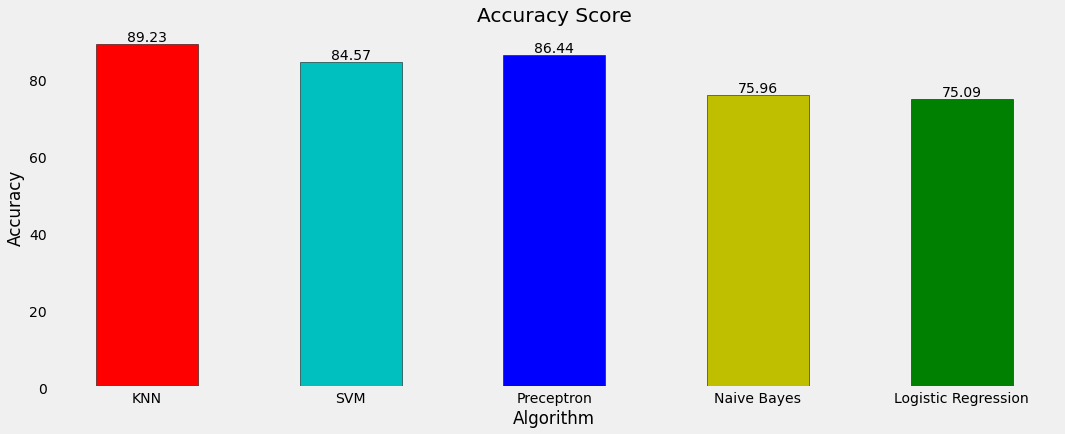

In [18]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
data = [knn_accuracy_average*100, svm_accuracy_average*100, preceptron_accuracy_average*100,
        nb_accuracy_average*100, lr_accuracy_average*100]
X_data = ['KNN', 'SVM', 'Preceptron', 'Naive Bayes', 'Logistic Regression']
fig = plt.figure()
fig.set_size_inches(14, 5)
ax = fig.add_axes([0,0,1,1])
plt.title('Accuracy Score')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.rc('grid', linestyle="-", color='gray')
plt.grid(False)

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.0*height,
                '%.2f' % float(height),
                ha='center', va='bottom')

rects1 = ax.bar(X_data, data, 0.5, color = ['r','c','b','y','g'],edgecolor = 'black')
autolabel(rects1)
plt.show()

# ROC AUC

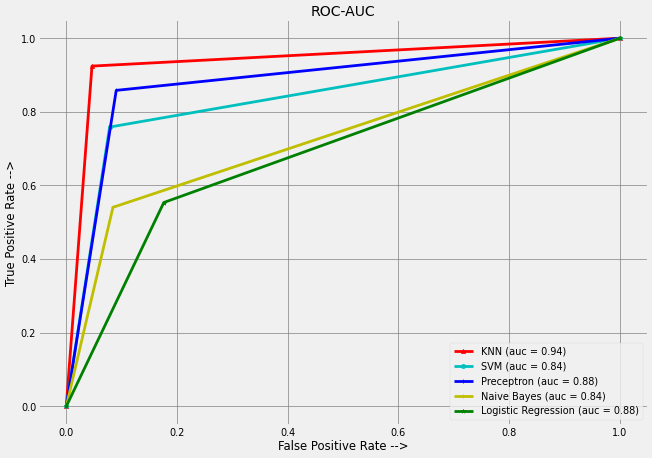

In [19]:
from sklearn.metrics import roc_curve, auc

fpr1, tpr1, threshold = roc_curve(knn_trained_model[i].predict(input_testing_data[0]), output_testing_data[0])
auc1 = auc(fpr1, tpr1)

fpr2, tpr2, threshold = roc_curve(svm_trained_model[i].predict(input_testing_data[0]), output_testing_data[0])
auc2 = auc(fpr2, tpr2)

fpr3, tpr3, threshold = roc_curve(preceptron_trained_model[i].predict(input_testing_data[0]), output_testing_data[0])
auc3 = auc(fpr3, tpr3)

fpr4, tpr4, threshold = roc_curve(nb_trained_model[i].predict(input_testing_data[0]), output_testing_data[0])
auc4 = auc(fpr4, tpr4)

fpr5, tpr5, threshold = roc_curve(lr_trained_model[i].predict(input_testing_data[0]), output_testing_data[0])
auc5 = auc(fpr5, tpr5)

plt.figure(figsize=(14, 10), dpi=50)
plt.plot(fpr1, tpr1, marker='^',color = "r", label='KNN (auc = %0.2f)' % auc1)
plt.plot(fpr2, tpr2, marker='o',color = "c", label='SVM (auc = %0.2f)' % auc2)
plt.plot(fpr3, tpr3, marker='|',color = "b", label='Preceptron (auc = %0.2f)' % auc3)
plt.plot(fpr4, tpr4, marker='+',color = "y", label='Naive Bayes (auc = %0.2f)' % auc2)
plt.plot(fpr5, tpr5, marker='*',color = "g", label='Logistic Regression (auc = %0.2f)' % auc3)
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.title("ROC-AUC")
plt.legend()
plt.show()

# Hyperparameter Tunning ( Grid Search CV )

# KNN Tunning

In [20]:
from sklearn.model_selection import GridSearchCV

def save(knn_model):
    pickle.dump(knn_model, open('Trained_Models/knn_tunned_trained_model_0'+str(i+1)+'.pkl', 'wb'))
    
for i in range(no_of_folds):
    n_neighbors = [1,2,3,4,5]
    random_grid = {'n_neighbors': n_neighbors}
    rf=KNeighborsClassifier()
    clf1=GridSearchCV(estimator=rf,param_grid=random_grid,n_jobs=-1,cv=10,verbose=2)
    clf1.fit(input_training_data[i],np.ravel(output_training_data[i]))
    clf1a = clf1.best_estimator_
    save(clf1a)
    print("KNN Tunned Model For Fold ", i+1, "-----", clf1a)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    3.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


KNN Tunned Model For Fold  1 ----- KNeighborsClassifier(n_neighbors=1)
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


KNN Tunned Model For Fold  2 ----- KNeighborsClassifier(n_neighbors=1)
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


KNN Tunned Model For Fold  3 ----- KNeighborsClassifier(n_neighbors=1)
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


KNN Tunned Model For Fold  4 ----- KNeighborsClassifier(n_neighbors=1)
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


KNN Tunned Model For Fold  5 ----- KNeighborsClassifier(n_neighbors=1)
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


KNN Tunned Model For Fold  6 ----- KNeighborsClassifier(n_neighbors=1)
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


KNN Tunned Model For Fold  7 ----- KNeighborsClassifier(n_neighbors=1)
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


KNN Tunned Model For Fold  8 ----- KNeighborsClassifier(n_neighbors=1)
Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


KNN Tunned Model For Fold  9 ----- KNeighborsClassifier(n_neighbors=1)
Fitting 10 folds for each of 5 candidates, totalling 50 fits
KNN Tunned Model For Fold  10 ----- KNeighborsClassifier(n_neighbors=1)


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.3s finished


### Evaluate the Performance of KNN Tunned Models

In [21]:
from sklearn.metrics import accuracy_score

knn_trained_model = {}
for i in range(no_of_folds):
    knn_trained_model[i] = pickle.load(open('Trained_Models/knn_tunned_trained_model_0'+str(i+1)+'.pkl', 'rb'))
    
accuracy_list = []
for i in range(no_of_folds): 
    model_predications = knn_trained_model[i].predict(input_testing_data[i])
    accuracy = accuracy_score(model_predications,output_testing_data[i])
    accuracy_list.append(accuracy);
    print("\nAccuracy Score For Fold -",i+1," = ", round(accuracy,4))
    print("=======================================")


Accuracy Score For Fold - 1  =  0.9187

Accuracy Score For Fold - 2  =  0.9057

Accuracy Score For Fold - 3  =  0.9076

Accuracy Score For Fold - 4  =  0.8909

Accuracy Score For Fold - 5  =  0.8963

Accuracy Score For Fold - 6  =  0.8981

Accuracy Score For Fold - 7  =  0.8944

Accuracy Score For Fold - 8  =  0.9222

Accuracy Score For Fold - 9  =  0.9037

Accuracy Score For Fold - 10  =  0.9


### Average Accuracy of KNN Tunned

In [22]:
knn_tunned_accuracy_average = sum(accuracy_list) / len(accuracy_list)
print("\n\n=================================") 
print("Average Accuracy Score: ", round(knn_tunned_accuracy_average*100,2), "%")
print("=================================\n\n") 



Average Accuracy Score:  90.38 %




# SVM Tunning

In [23]:
from sklearn.model_selection import GridSearchCV

def save(svm_model):
    pickle.dump(svm_model, open('Trained_Models/svm_tunned_trained_model_0'+str(i+1)+'.pkl', 'wb'))
    
for i in range(no_of_folds):
    kernel = [ 'rbf', 'sigmoid']
    random_grid = {'kernel': kernel}
    rf=SVC()
    clf1=GridSearchCV(estimator=rf,param_grid=random_grid,n_jobs=-1,cv=10,verbose=2)
    clf1.fit(input_training_data[i],np.ravel(output_training_data[i]))
    clf1a = clf1.best_estimator_
    save(clf1a)
    print("SVM Tunned Model For Fold ", i+1, "-----", clf1a)

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:    0.9s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    1.2s finished


SVM Tunned Model For Fold  1 ----- SVC()
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:    1.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    1.3s finished


SVM Tunned Model For Fold  2 ----- SVC()
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:    1.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    1.3s finished


SVM Tunned Model For Fold  3 ----- SVC()
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:    0.9s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    1.2s finished


SVM Tunned Model For Fold  4 ----- SVC()
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:    0.9s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    1.2s finished


SVM Tunned Model For Fold  5 ----- SVC()
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:    1.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    1.2s finished


SVM Tunned Model For Fold  6 ----- SVC()
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:    0.9s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    1.2s finished


SVM Tunned Model For Fold  7 ----- SVC()
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:    1.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    1.2s finished


SVM Tunned Model For Fold  8 ----- SVC()
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:    1.0s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    1.2s finished


SVM Tunned Model For Fold  9 ----- SVC()
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:    0.9s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    1.2s finished


SVM Tunned Model For Fold  10 ----- SVC()


### Evaluate the Performance of SVM Tunned Models

In [24]:
from sklearn.metrics import accuracy_score

svm_trained_model = {}
for i in range(no_of_folds):
    svm_trained_model[i] = pickle.load(open('Trained_Models/svm_tunned_trained_model_0'+str(i+1)+'.pkl', 'rb'))
    
accuracy_list = []
for i in range(no_of_folds): 
    model_predications = svm_trained_model[i].predict(input_testing_data[i])
    accuracy = accuracy_score(model_predications,output_testing_data[i])
    accuracy_list.append(accuracy);
    print("\nAccuracy Score For Fold -",i+1," = ", round(accuracy,4))
    print("=======================================")


Accuracy Score For Fold - 1  =  0.8688

Accuracy Score For Fold - 2  =  0.8133

Accuracy Score For Fold - 3  =  0.8336

Accuracy Score For Fold - 4  =  0.8632

Accuracy Score For Fold - 5  =  0.8519

Accuracy Score For Fold - 6  =  0.8333

Accuracy Score For Fold - 7  =  0.8481

Accuracy Score For Fold - 8  =  0.8685

Accuracy Score For Fold - 9  =  0.8519

Accuracy Score For Fold - 10  =  0.8241


### Average Accuracy of SVM Tunned

In [25]:
svm_tunned_accuracy_average = sum(accuracy_list) / len(accuracy_list)
print("\n\n=================================") 
print("Average Accuracy Score: ", round(svm_tunned_accuracy_average*100,2), "%")
print("=================================\n\n") 



Average Accuracy Score:  84.57 %




# Preceptron Tunning

In [26]:
from sklearn.model_selection import GridSearchCV

def save(preceptron_model):
    pickle.dump(preceptron_model, open('Trained_Models/preceptron_tunned_trained_model_0'+str(i+1)+'.pkl', 'wb'))
    
for i in range(no_of_folds):
    learning_rate = [ 'constant', 'adaptive']
    random_grid = {'learning_rate': learning_rate}
    rf=MLPClassifier(max_iter=1000)
    clf1=GridSearchCV(estimator=rf,param_grid=random_grid,n_jobs=-1,cv=10,verbose=2)
    clf1.fit(input_training_data[i],np.ravel(output_training_data[i]))
    clf1a = clf1.best_estimator_
    save(clf1a)
    print("Preceptron Tunned Model For Fold ", i+1, "-----", clf1a)

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:   48.7s remaining:   12.1s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   57.9s finished


Preceptron Tunned Model For Fold  1 ----- MLPClassifier(learning_rate='adaptive', max_iter=1000)
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:   51.5s remaining:   12.8s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   57.0s finished


Preceptron Tunned Model For Fold  2 ----- MLPClassifier(max_iter=1000)
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:   52.2s remaining:   13.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.0min finished


Preceptron Tunned Model For Fold  3 ----- MLPClassifier(learning_rate='adaptive', max_iter=1000)
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:   55.4s remaining:   13.8s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.2min finished


Preceptron Tunned Model For Fold  4 ----- MLPClassifier(learning_rate='adaptive', max_iter=1000)
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:   60.0s remaining:   14.9s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.2min finished


Preceptron Tunned Model For Fold  5 ----- MLPClassifier(learning_rate='adaptive', max_iter=1000)
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:   57.8s remaining:   14.4s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.1min finished


Preceptron Tunned Model For Fold  6 ----- MLPClassifier(max_iter=1000)
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:  1.1min remaining:   15.7s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.2min finished


Preceptron Tunned Model For Fold  7 ----- MLPClassifier(max_iter=1000)
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:   56.7s remaining:   14.1s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.0min finished


Preceptron Tunned Model For Fold  8 ----- MLPClassifier(learning_rate='adaptive', max_iter=1000)
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:   58.2s remaining:   14.5s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.1min finished


Preceptron Tunned Model For Fold  9 ----- MLPClassifier(max_iter=1000)
Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:  1.1min remaining:   15.7s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.1min finished


Preceptron Tunned Model For Fold  10 ----- MLPClassifier(learning_rate='adaptive', max_iter=1000)


### Evaluate the Performance of Preceptron Tunned Models

In [27]:
from sklearn.metrics import accuracy_score

preceptron_trained_model = {}
for i in range(no_of_folds):
    preceptron_trained_model[i] = pickle.load(open('Trained_Models/preceptron_tunned_trained_model_0'+str(i+1)+'.pkl', 'rb'))
    
accuracy_list = []
for i in range(no_of_folds): 
    model_predications = preceptron_trained_model[i].predict(input_testing_data[i])
    accuracy = accuracy_score(model_predications,output_testing_data[i])
    accuracy_list.append(accuracy);
    print("\nAccuracy Score For Fold -",i+1," = ", round(accuracy,4))
    print("=======================================")


Accuracy Score For Fold - 1  =  0.8854

Accuracy Score For Fold - 2  =  0.8336

Accuracy Score For Fold - 3  =  0.8577

Accuracy Score For Fold - 4  =  0.8743

Accuracy Score For Fold - 5  =  0.8519

Accuracy Score For Fold - 6  =  0.85

Accuracy Score For Fold - 7  =  0.8537

Accuracy Score For Fold - 8  =  0.8907

Accuracy Score For Fold - 9  =  0.8704

Accuracy Score For Fold - 10  =  0.8463


### Average Accuracy of Preceptron Tunned

In [28]:
preceptron_tunned_accuracy_average = sum(accuracy_list) / len(accuracy_list)
print("\n\n=================================") 
print("Average Accuracy Score: ", round(preceptron_tunned_accuracy_average*100,2), "%")
print("=================================\n\n") 



Average Accuracy Score:  86.14 %




# Naive Bayes Tunning

In [29]:
from sklearn.model_selection import GridSearchCV

def save(nb_model):
    pickle.dump(nb_model, open('Trained_Models/nb_tunned_trained_model_0'+str(i+1)+'.pkl', 'wb'))
    
for i in range(no_of_folds):
    var_smoothing = [int(x) for x in np.linspace(start = 1e-8, stop = 5e-10, num = 10)]
    random_grid = {'var_smoothing': var_smoothing}
    rf=GaussianNB()
    clf1=GridSearchCV(estimator=rf,param_grid=random_grid,n_jobs=1,cv=10,verbose=2)
    clf1.fit(input_training_data[i],np.ravel(output_training_data[i]))
    clf1a = clf1.best_estimator_
    save(clf1a)
    print("NB Tunned Model For Fold ", i+1, "-----", clf1a)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] var_smoothing=0 .................................................
[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .

[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .

[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .................................. var_smoothing=0, total=   0.0s
NB Tunned Model For Fold  2 ----- GaussianNB(var_smoothing=0)
Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] var_smoothing=0 .................................................
[CV] ..................

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .

[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .................................. var_smoothing=0, total=   0.0s
NB Tunned Model For Fold  3 ----- GaussianNB(var_smoothing=0)
Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] var_smoothing=0 .................................................
[CV] ..................

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .

NB Tunned Model For Fold  4 ----- GaussianNB(var_smoothing=0)


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] var_smoothing=0 .................................................
[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .........

[CV] var_smoothing=0 .................................................
[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .................................. var_smoothing=0, total=   0.0s
[CV] v

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .

[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .

[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] var_smoothing=0 .................................................
[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .................................. var_smoothing=0, total=   0.0s
[CV] v

[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .

[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .

[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .................................. var_smoothing=0, total=   0.0s
[CV] var_smoothing=0 .................................................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.4s finished


### Evaluate the Performance of NB Tunned Models

In [30]:
from sklearn.metrics import accuracy_score

nb_trained_model = {}
for i in range(no_of_folds):
    nb_trained_model[i] = pickle.load(open('Trained_Models/nb_tunned_trained_model_0'+str(i+1)+'.pkl', 'rb'))
    
accuracy_list = []
for i in range(no_of_folds): 
    model_predications = nb_trained_model[i].predict(input_testing_data[i])
    accuracy = accuracy_score(model_predications,output_testing_data[i])
    accuracy_list.append(accuracy);
    print("\nAccuracy Score For Fold -",i+1," = ", round(accuracy,4))
    print("=======================================")


Accuracy Score For Fold - 1  =  0.7652

Accuracy Score For Fold - 2  =  0.7616

Accuracy Score For Fold - 3  =  0.7597

Accuracy Score For Fold - 4  =  0.7579

Accuracy Score For Fold - 5  =  0.7741

Accuracy Score For Fold - 6  =  0.7574

Accuracy Score For Fold - 7  =  0.7815

Accuracy Score For Fold - 8  =  0.7481

Accuracy Score For Fold - 9  =  0.7574

Accuracy Score For Fold - 10  =  0.7333


### Average Accuracy of NB Tunned

In [31]:
nb_tunned_accuracy_average = sum(accuracy_list) / len(accuracy_list)
print("\n\n=================================") 
print("Average Accuracy Score: ", round(nb_tunned_accuracy_average*100,2), "%")
print("=================================\n\n") 



Average Accuracy Score:  75.96 %




# Logistic Regression Tunning

In [32]:
from sklearn.model_selection import GridSearchCV

def save(lr_model):
    pickle.dump(lr_model, open('Trained_Models/lr_tunned_trained_model_0'+str(i+1)+'.pkl', 'wb'))
    
for i in range(no_of_folds):
    class_weight = ['balanced', None]
    random_grid = {'class_weight': class_weight}
    rf=LogisticRegression()
    clf1=GridSearchCV(estimator=rf,param_grid=random_grid,n_jobs=1,cv=10,verbose=2)
    clf1.fit(input_training_data[i],np.ravel(output_training_data[i]))
    clf1a = clf1.best_estimator_
    save(clf1a)
    print("lr Tunned Model For Fold ", i+1, "-----", clf1a)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Fitting 10 folds for each of 2 candidates, totalling 20 fits
[CV] class_weight=balanced ...........................................
[CV] ............................ class_weight=balanced, total=   0.0s
[CV] class_weight=balanced ...........................................
[CV] ............................ class_weight=balanced, total=   0.0s
[CV] class_weight=balanced ...........................................
[CV] ............................ class_weight=balanced, total=   0.0s
[CV] class_weight=balanced ...........................................
[CV] ............................ class_weight=balanced, total=   0.0s
[CV] class_weight=balanced ...........................................
[CV] ............................ class_weight=balanced, total=   0.0s
[CV] class_weight=balanced ...........................................
[CV] ............................ class_weight=balanced, total=   0.0s
[CV] class_weight=balanced ...........................................
[CV] ...........

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ............................ class_weight=balanced, total=   0.0s
[CV] class_weight=None ...............................................
[CV] ................................ class_weight=None, total=   0.0s
[CV] class_weight=None ...............................................
[CV] ................................ class_weight=None, total=   0.0s
[CV] class_weight=None ...............................................
[CV] ................................ class_weight=None, total=   0.0s
[CV] class_weight=None ...............................................
[CV] ................................ class_weight=None, total=   0.0s
[CV] class_weight=None ...............................................
[CV] ................................ class_weight=None, total=   0.0s
[CV] class_weight=None ...............................................
[CV] ................................ class_weight=None, total=   0.0s
[CV] class_weight=None ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ............................ class_weight=balanced, total=   0.0s
[CV] class_weight=balanced ...........................................
[CV] ............................ class_weight=balanced, total=   0.0s
[CV] class_weight=balanced ...........................................
[CV] ............................ class_weight=balanced, total=   0.0s
[CV] class_weight=balanced ...........................................
[CV] ............................ class_weight=balanced, total=   0.0s
[CV] class_weight=balanced ...........................................
[CV] ............................ class_weight=balanced, total=   0.0s
[CV] class_weight=balanced ...........................................
[CV] ............................ class_weight=balanced, total=   0.0s
[CV] class_weight=None ...............................................
[CV] ................................ class_weight=None, total=   0.0s
[CV] class_weight=None ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ................................ class_weight=None, total=   0.0s
[CV] class_weight=None ...............................................
[CV] ................................ class_weight=None, total=   0.0s
[CV] class_weight=None ...............................................
[CV] ................................ class_weight=None, total=   0.0s
[CV] class_weight=None ...............................................
[CV] ................................ class_weight=None, total=   0.0s
[CV] class_weight=None ...............................................
[CV] ................................ class_weight=None, total=   0.0s
[CV] class_weight=None ...............................................
[CV] ................................ class_weight=None, total=   0.0s
[CV] class_weight=None ...............................................
[CV] ................................ class_weight=None, total=   0.0s
[CV] class_weight=None ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ................................ class_weight=None, total=   0.0s
[CV] class_weight=None ...............................................
[CV] ................................ class_weight=None, total=   0.0s
[CV] class_weight=None ...............................................
[CV] ................................ class_weight=None, total=   0.0s
[CV] class_weight=None ...............................................
[CV] ................................ class_weight=None, total=   0.0s
[CV] class_weight=None ...............................................
[CV] ................................ class_weight=None, total=   0.0s
[CV] class_weight=None ...............................................
[CV] ................................ class_weight=None, total=   0.0s
[CV] class_weight=None ...............................................
[CV] ................................ class_weight=None, total=   0.0s
[CV] class_weight=None ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ............................ class_weight=balanced, total=   0.0s
[CV] class_weight=balanced ...........................................
[CV] ............................ class_weight=balanced, total=   0.0s
[CV] class_weight=balanced ...........................................
[CV] ............................ class_weight=balanced, total=   0.0s
[CV] class_weight=balanced ...........................................
[CV] ............................ class_weight=balanced, total=   0.0s
[CV] class_weight=None ...............................................
[CV] ................................ class_weight=None, total=   0.0s
[CV] class_weight=None ...............................................
[CV] ................................ class_weight=None, total=   0.0s
[CV] class_weight=None ...............................................
[CV] ................................ class_weight=None, total=   0.0s
[CV] class_weight=None ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ................................ class_weight=None, total=   0.0s
[CV] class_weight=None ...............................................
[CV] ................................ class_weight=None, total=   0.0s
[CV] class_weight=None ...............................................
[CV] ................................ class_weight=None, total=   0.0s
[CV] class_weight=None ...............................................
[CV] ................................ class_weight=None, total=   0.0s
[CV] class_weight=None ...............................................
[CV] ................................ class_weight=None, total=   0.0s
[CV] class_weight=None ...............................................
[CV] ................................ class_weight=None, total=   0.0s
[CV] class_weight=None ...............................................
[CV] ................................ class_weight=None, total=   0.0s
[CV] class_weight=None ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ................................ class_weight=None, total=   0.0s
[CV] class_weight=None ...............................................
[CV] ................................ class_weight=None, total=   0.0s
[CV] class_weight=None ...............................................
[CV] ................................ class_weight=None, total=   0.0s
[CV] class_weight=None ...............................................
[CV] ................................ class_weight=None, total=   0.0s
[CV] class_weight=None ...............................................
[CV] ................................ class_weight=None, total=   0.0s
[CV] class_weight=None ...............................................
[CV] ................................ class_weight=None, total=   0.0s
[CV] class_weight=None ...............................................
[CV] ................................ class_weight=None, total=   0.0s
[CV] class_weight=None ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ............................ class_weight=balanced, total=   0.0s
[CV] class_weight=balanced ...........................................
[CV] ............................ class_weight=balanced, total=   0.0s
[CV] class_weight=balanced ...........................................
[CV] ............................ class_weight=balanced, total=   0.0s
[CV] class_weight=balanced ...........................................
[CV] ............................ class_weight=balanced, total=   0.0s
[CV] class_weight=None ...............................................
[CV] ................................ class_weight=None, total=   0.0s
[CV] class_weight=None ...............................................
[CV] ................................ class_weight=None, total=   0.0s
[CV] class_weight=None ...............................................
[CV] ................................ class_weight=None, total=   0.0s
[CV] class_weight=None ...............................................
[CV] .

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ................................ class_weight=None, total=   0.0s
[CV] class_weight=None ...............................................
[CV] ................................ class_weight=None, total=   0.0s
[CV] class_weight=None ...............................................
[CV] ................................ class_weight=None, total=   0.0s
[CV] class_weight=None ...............................................
[CV] ................................ class_weight=None, total=   0.0s
[CV] class_weight=None ...............................................
[CV] ................................ class_weight=None, total=   0.0s
[CV] class_weight=None ...............................................
[CV] ................................ class_weight=None, total=   0.0s
[CV] class_weight=None ...............................................
[CV] ................................ class_weight=None, total=   0.0s
lr Tunned Model For Fold  10 ----- LogisticRegression()


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.1s finished


### Evaluate the Performance of LR Tunned Models

In [33]:
from sklearn.metrics import accuracy_score

lr_trained_model = {}
for i in range(no_of_folds):
    lr_trained_model[i] = pickle.load(open('Trained_Models/lr_tunned_trained_model_0'+str(i+1)+'.pkl', 'rb'))
    
accuracy_list = []
for i in range(no_of_folds): 
    model_predications = lr_trained_model[i].predict(input_testing_data[i])
    accuracy = accuracy_score(model_predications,output_testing_data[i])
    accuracy_list.append(accuracy);
    print("\nAccuracy Score For Fold -",i+1," = ", round(accuracy,4))
    print("=======================================")


Accuracy Score For Fold - 1  =  0.7652

Accuracy Score For Fold - 2  =  0.732

Accuracy Score For Fold - 3  =  0.7652

Accuracy Score For Fold - 4  =  0.7689

Accuracy Score For Fold - 5  =  0.7259

Accuracy Score For Fold - 6  =  0.7481

Accuracy Score For Fold - 7  =  0.7463

Accuracy Score For Fold - 8  =  0.7574

Accuracy Score For Fold - 9  =  0.7556

Accuracy Score For Fold - 10  =  0.7444


### Average Accuracy of LR Tunned

In [34]:
lr_tunned_accuracy_average = sum(accuracy_list) / len(accuracy_list)
print("\n\n=================================") 
print("Average Accuracy Score: ", round(lr_tunned_accuracy_average*100,2), "%")
print("=================================\n\n") 



Average Accuracy Score:  75.09 %




# Comparing Performance of Tunned Models

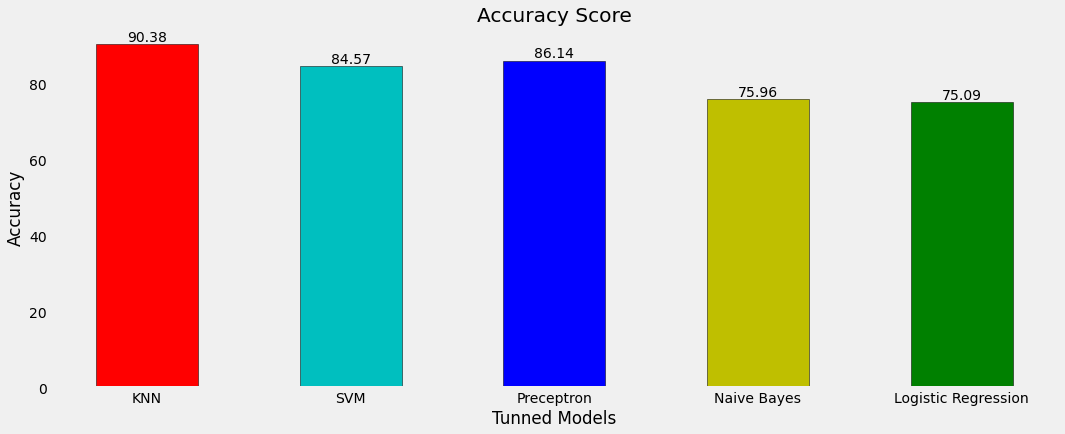

In [35]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
data = [knn_tunned_accuracy_average*100, svm_tunned_accuracy_average*100, preceptron_tunned_accuracy_average*100,
        nb_tunned_accuracy_average*100, lr_tunned_accuracy_average*100]
X_data = ['KNN', 'SVM', 'Preceptron', 'Naive Bayes', 'Logistic Regression']
fig = plt.figure()
fig.set_size_inches(14, 5)
ax = fig.add_axes([0,0,1,1])
plt.title('Accuracy Score')
plt.xlabel('Tunned Models')
plt.ylabel('Accuracy')
plt.rc('grid', linestyle="-", color='gray')
plt.grid(False)

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.0*height,
                '%.2f' % float(height),
                ha='center', va='bottom')

rects1 = ax.bar(X_data, data, 0.5, color = ['r','c','b','y','g'],edgecolor = 'black')
autolabel(rects1)
plt.show()

# AUC ROC

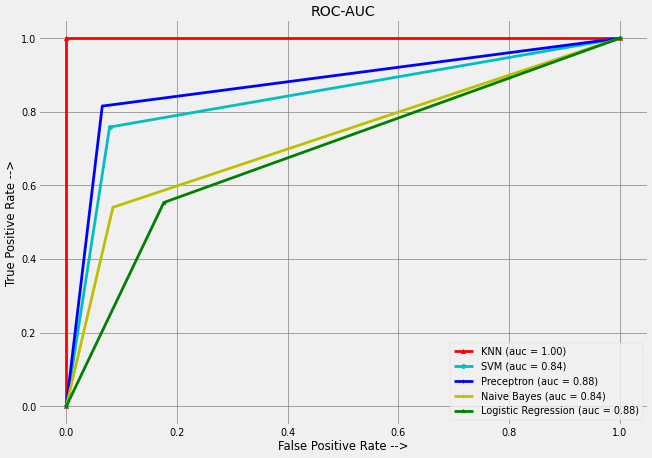

In [36]:
from sklearn.metrics import roc_curve, auc

fpr1, tpr1, threshold = roc_curve(knn_trained_model[i].predict(input_testing_data[0]), output_testing_data[0])
auc1 = auc(fpr1, tpr1)

fpr2, tpr2, threshold = roc_curve(svm_trained_model[i].predict(input_testing_data[0]), output_testing_data[0])
auc2 = auc(fpr2, tpr2)

fpr3, tpr3, threshold = roc_curve(preceptron_trained_model[i].predict(input_testing_data[0]), output_testing_data[0])
auc3 = auc(fpr3, tpr3)

fpr4, tpr4, threshold = roc_curve(nb_trained_model[i].predict(input_testing_data[0]), output_testing_data[0])
auc4 = auc(fpr4, tpr4)

fpr5, tpr5, threshold = roc_curve(lr_trained_model[i].predict(input_testing_data[0]), output_testing_data[0])
auc5 = auc(fpr5, tpr5)

plt.figure(figsize=(14, 10), dpi=50)
plt.plot(fpr1, tpr1, marker='^',color = "r", label='KNN (auc = %0.2f)' % auc1)
plt.plot(fpr2, tpr2, marker='o',color = "c", label='SVM (auc = %0.2f)' % auc2)
plt.plot(fpr3, tpr3, marker='|',color = "b", label='Preceptron (auc = %0.2f)' % auc3)
plt.plot(fpr4, tpr4, marker='+',color = "y", label='Naive Bayes (auc = %0.2f)' % auc2)
plt.plot(fpr5, tpr5, marker='*',color = "g", label='Logistic Regression (auc = %0.2f)' % auc3)
plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.title("ROC-AUC")
plt.legend()
plt.show()

# Hyperparameter Tunning ( Hyperopt )

# KNN Tunning

In [37]:
from hyperopt import hp,fmin,tpe,Trials,STATUS_OK
from sklearn.model_selection import cross_val_score
    
space = {'n_neighbors':hp.choice('n_neighbors',[1,2,3,4,5])}
    
def objective(space):
    model = KNeighborsClassifier(n_neighbors = space['n_neighbors'])
    accuracy = cross_val_score(model, input_training_data[1],np.ravel(output_training_data[1]), cv = 10).mean()
    return {'loss': -accuracy, 'status': STATUS_OK }

trials = Trials()
best = fmin(fn= objective,
            space= space,
            algo= tpe.suggest,
            max_evals = 10,
            trials= trials)

neig = {0: 1, 1: 2, 2: 3, 3: 4, 4: 5}

knn = KNeighborsClassifier(n_neighbors = neig[best['n_neighbors']]).fit(input_training_data[1],np.ravel(output_training_data[1]))
pred=knn.predict(input_testing_data[1])
accuracy_1 = accuracy_score(np.ravel(output_testing_data[1]),pred)
print("\n\n====================================")
print("Accuracuy Score: ", accuracy_1)
print("====================================\n\n")

100%|██████████| 10/10 [00:02<00:00,  3.53trial/s, best loss: -0.9027357382479444]


Accuracuy Score:  0.9057301293900185




# SVM Tunning

In [38]:
from hyperopt import hp,fmin,tpe,Trials,STATUS_OK
from sklearn.model_selection import cross_val_score
    
space = {'kernel':hp.choice('kernel',[ 'rbf', 'sigmoid'])}
    
def objective(space):
    model = SVC(kernel = space['kernel'])
    accuracy = cross_val_score(model, input_training_data[1],np.ravel(output_training_data[1]), cv = 10).mean()
    return {'loss': -accuracy, 'status': STATUS_OK }

trials = Trials()
best = fmin(fn= objective,
            space= space,
            algo= tpe.suggest,
            max_evals = 10,
            trials= trials)

neig = {0: 'rbf', 1: 'sigmoid'}

svc = SVC(kernel = neig[best['kernel']]).fit(input_training_data[1],np.ravel(output_training_data[1]))
pred=svc.predict(input_testing_data[1])
accuracy_2 = accuracy_score(np.ravel(output_testing_data[1]),pred)
print("\n\n====================================")
print("Accuracuy Score: ", accuracy_2)
print("====================================\n\n")

100%|██████████| 10/10 [00:24<00:00,  2.49s/trial, best loss: -0.8484401010638749]


Accuracuy Score:  0.8133086876155268




# Preceptron Tunning

In [39]:
from hyperopt import hp,fmin,tpe,Trials,STATUS_OK
from sklearn.model_selection import cross_val_score
    
space = {'learning_rate ':hp.choice('learning_rate ',[ 'constant', 'adaptive'])}
    
def objective(space):
    model = MLPClassifier(max_iter=1000,learning_rate  = space['learning_rate '])
    accuracy = cross_val_score(model, input_training_data[1],np.ravel(output_training_data[1]), cv = 2).mean()
    return {'loss': -accuracy, 'status': STATUS_OK }

trials = Trials()
best = fmin(fn= objective,
            space= space,
            algo= tpe.suggest,
            max_evals = 2,
            trials= trials)

neig = {0: 'constant', 1: 'adaptive'}

mlp = MLPClassifier(learning_rate  = neig[best['learning_rate ']]).fit(input_training_data[1],np.ravel(output_training_data[1]))
pred=mlp.predict(input_testing_data[1])
accuracy_3 = accuracy_score(np.ravel(output_testing_data[1]),pred)
print("\n\n====================================")
print("Accuracuy Score: ", accuracy_3)
print("====================================\n\n")

100%|██████████| 2/2 [00:36<00:00, 18.17s/trial, best loss: -0.8655140935883002]


Accuracuy Score:  0.8391866913123844




C:\Users\codef\anaconda3\envs\New\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# Naive Bayes Tunning

In [40]:
from hyperopt import hp,fmin,tpe,Trials,STATUS_OK
from sklearn.model_selection import cross_val_score
    
space = {'var_smoothing':hp.choice('var_smoothing',[ 1e-4, 1e-5, 1e-6, 1e-7, 1e-8])}
    
def objective(space):
    model = GaussianNB(var_smoothing = space['var_smoothing'])
    accuracy = cross_val_score(model, input_training_data[1],np.ravel(output_training_data[1]), cv = 10).mean()
    return {'loss': -accuracy, 'status': STATUS_OK }

trials = Trials()
best = fmin(fn= objective,
            space= space,
            algo= tpe.suggest,
            max_evals = 10,
            trials= trials)

neig = {0: 1e-4, 1: 1e-5, 2: 1e-6, 3: 1e-7, 4: 1e-8}

mlp = GaussianNB(var_smoothing = neig[best['var_smoothing']]).fit(input_training_data[1],np.ravel(output_training_data[1]))
pred=mlp.predict(input_testing_data[1])
accuracy_4 = accuracy_score(np.ravel(output_testing_data[1]),pred)
print("\n\n====================================")
print("Accuracuy Score: ", accuracy_4)
print("====================================\n\n")

100%|██████████| 10/10 [00:00<00:00, 18.51trial/s, best loss: -0.7641324646572195]


Accuracuy Score:  0.7615526802218114




# Logistic Regression Tunning

In [41]:
from hyperopt import hp,fmin,tpe,Trials,STATUS_OK
from sklearn.model_selection import cross_val_score
    
space = {'class_weight':hp.choice('class_weight',[ 'balanced', None])}
    
def objective(space):
    model = LogisticRegression(class_weight = space['class_weight'])
    accuracy = cross_val_score(model, input_training_data[1],np.ravel(output_training_data[1]), cv = 10).mean()
    return {'loss': -accuracy, 'status': STATUS_OK }

trials = Trials()
best = fmin(fn= objective,
            space= space,
            algo= tpe.suggest,
            max_evals = 10,
            trials= trials)

neig = {0: 'balanced', 1: None}

mlp = LogisticRegression(class_weight = neig[best['class_weight']]).fit(input_training_data[1],np.ravel(output_training_data[1]))
pred=mlp.predict(input_testing_data[1])
accuracy_5 = accuracy_score(np.ravel(output_testing_data[1]),pred)
print("\n\n====================================")
print("Accuracuy Score: ", accuracy_5)
print("====================================\n\n")

100%|██████████| 10/10 [00:01<00:00,  8.77trial/s, best loss: -0.7540569202558709]


Accuracuy Score:  0.7319778188539742




# Comparing Performance of Tunned Models with Hyperopt

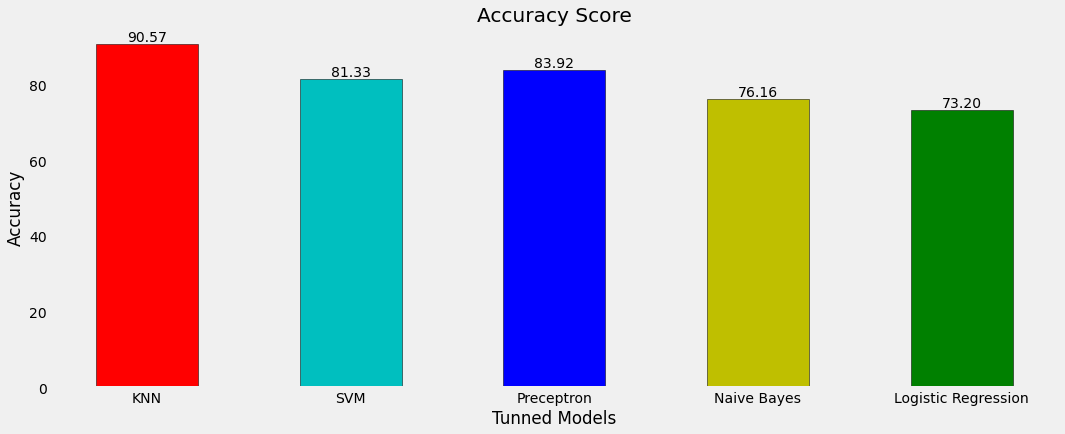

In [42]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
data = [accuracy_1*100, accuracy_2*100, accuracy_3*100, accuracy_4*100, accuracy_5*100]
X_data = ['KNN', 'SVM', 'Preceptron', 'Naive Bayes', 'Logistic Regression']
fig = plt.figure()
fig.set_size_inches(14, 5)
ax = fig.add_axes([0,0,1,1])
plt.title('Accuracy Score')
plt.xlabel('Tunned Models')
plt.ylabel('Accuracy')
plt.rc('grid', linestyle="-", color='gray')
plt.grid(False)

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.0*height,
                '%.2f' % float(height),
                ha='center', va='bottom')

rects1 = ax.bar(X_data, data, 0.5, color = ['r','c','b','y','g'],edgecolor = 'black')
autolabel(rects1)
plt.show()

<center>
    <br>
        <br>
            <h5 style = "color:blue">----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</h5>
                <h1 style = "color:green">Thank you so much</h1>
            <h5 style = "color:blue">----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</h5>
        <br>
    <br>
</center>